# SmartVote-Lite
## Blockchain-Based Voting System with AI Anomaly Detection
## Final Year Project – CSE (Anna University)



### Objective
To design and implement a secure blockchain-based voting system and
integrate an AI-based anomaly detection model to identify suspicious
voting behavior such as vote duplication and sudden vote spikes.


### Technologies Used
- Python 3
- Jupyter Notebook
- Blockchain (SHA-256 hashing)
- Machine Learning (Isolation Forest)
- Pandas (Data Processing)


In [22]:

### Step 1: Import Required Libraries
import hashlib
import time
import random
import pandas as pd
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
%matplotlib inline


In [23]:
# Step 2: Block class for blockchain
class Block:
    def __init__(self, index, data, previous_hash):
        self.index = index
        self.timestamp = time.time()
        self.data = data
        self.previous_hash = previous_hash
        self.hash = self.calculate_hash()
        
    def calculate_hash(self):
        content = f"{self.index}{self.timestamp}{self.data}{self.previous_hash}"
        return hashlib.sha256(content.encode()).hexdigest()


In [24]:
# Step 3: Define Blockchain class
# Manages blocks and maintains chain integrity

class Blockchain:
    def __init__(self):
        self.chain = [self.create_genesis_block()]

    def create_genesis_block(self):
        return Block(0, "Genesis Block", "0")

    def get_latest_block(self):
        return self.chain[-1]

    def add_block(self, data):
        new_block = Block(
            index=len(self.chain),
            data=data,
            previous_hash=self.get_latest_block().hash
        )
        self.chain.append(new_block)

    def display_chain(self):
        for block in self.chain:
            print("Index:", block.index)
            print("Hash:", block.hash)
            print("Data:", block.data)
            print("-"*40)



In [25]:
# Step 4: Initialize blockchain and vote storage list

blockchain = Blockchain()
vote_log = []


### Phase 1 pre-generated pattern based voting

In [26]:
# Step 5: Pre-generated pattern-based voting

regions = ["Chennai", "Madurai", "Coimbatore"]
candidates = ["A", "B"]

# Voting pattern probabilities
region_weights = [0.5, 0.3, 0.2]  # Chennai votes more frequently
candidate_weights = {
    "Chennai": [0.7, 0.3],      # Candidate A popular in Chennai
    "Madurai": [0.4, 0.6],      # Candidate B popular in Madurai
    "Coimbatore": [0.5, 0.5]    # Equal popularity
}

for i in range(120):  # simulate 120 votes
    region = random.choices(regions, weights=region_weights)[0]
    candidate = random.choices(candidates, weights=candidate_weights[region])[0]
    
    vote = {
        "voter_id": f"TN{i+1000}",
        "region": region,
        "candidate": candidate,
        "timestamp": time.time()
    }
    
    blockchain.add_block(vote)
    vote_log.append(vote)
    
    # Artificial abnormal spike after 70 votes in Chennai
    if i > 70 and region == "Chennai":
        time.sleep(0.05)  # suspicious fast voting
    else:
        time.sleep(0.01)  # normal voting speed


In [27]:
# Step 6: Convert vote data to DataFrame
# time_diff is used to detect abnormal voting speed

df = pd.DataFrame(vote_log)
df["time_diff"] = df["timestamp"].diff().fillna(0)
df.head()



,voter_id,region,candidate,timestamp,time_diff
0,TN1000,Chennai,A,1.767515e+09,0.000000
1,TN1001,Chennai,B,1.767515e+09,0.012658
2,TN1002,Coimbatore,B,1.767515e+09,0.012660
3,TN1003,Madurai,B,1.767515e+09,0.010344
4,TN1004,Chennai,A,1.767515e+09,0.012612


In [28]:
# Step 7: Apply AI-based anomaly detection
# Isolation Forest detects abnormal voting intervals
X = df[["time_diff"]]

model = IsolationForest(contamination=0.15, random_state=42)
df["anomaly"] = model.fit_predict(X)
df["status"] = df["anomaly"].apply(lambda x: "Suspicious Spike" if x==-1 else "Normal")


In [29]:
# Step 8: Display suspicious voting records detected by AI

df[df["status"] == "Suspicious Spike"]


,voter_id,region,candidate,timestamp,time_diff,anomaly,status
0,TN1000,Chennai,A,1.767515e+09,0.000000,-1,Suspicious Spike
8,TN1008,Chennai,A,1.767515e+09,0.012366,-1,Suspicious Spike
11,TN1011,Madurai,B,1.767515e+09,0.011591,-1,Suspicious Spike
34,TN1034,Madurai,B,1.767515e+09,0.012151,-1,Suspicious Spike
41,TN1041,Madurai,A,1.767515e+09,0.011469,-1,Suspicious Spike
45,TN1045,Coimbatore,A,1.767515e+09,0.010164,-1,Suspicious Spike
56,TN1056,Chennai,A,1.767515e+09,0.010197,-1,Suspicious Spike
75,TN1075,Chennai,A,1.767515e+09,0.052989,-1,Suspicious Spike
83,TN1083,Madurai,A,1.767515e+09,0.055108,-1,Suspicious Spike
88,TN1088,Chennai,A,1.767515e+09,0.052269,-1,Suspicious Spike


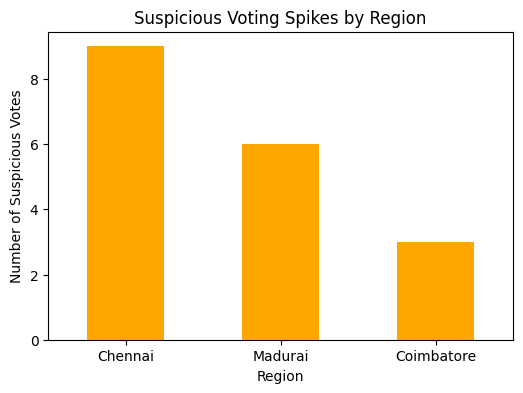

In [30]:
# Step 8.1: Visualize suspicious voting spikes by region

spike_counts = df[df["status"] == "Suspicious Spike"]["region"].value_counts()

plt.figure(figsize=(6,4))
spike_counts.plot(kind="bar", color='orange', title="Suspicious Voting Spikes by Region")
plt.xlabel("Region")
plt.ylabel("Number of Suspicious Votes")
plt.xticks(rotation=0)
plt.show()



### phase 2  live input realdemo

In [31]:
# Step 5.1: Live vote input with automatic anomaly detection & graph update
def cast_vote_live():
    voter_id = input("Enter Voter ID: ")
    region = input("Enter Region (Chennai/Madurai/Coimbatore): ")
    candidate = input("Enter Candidate (A/B): ")

    # Record the live vote
    vote = {
        "voter_id": voter_id,
        "region": region,
        "candidate": candidate,
        "timestamp": time.time()
    }

    blockchain.add_block(vote)
    vote_log.append(vote)
    print(f"✅ Vote recorded successfully for {voter_id} in {region} for candidate {candidate}.")

    # --- Update DataFrame with all votes (pre-generated + live) ---
    df = pd.DataFrame(vote_log)
    df["time_diff"] = df["timestamp"].diff().fillna(0)

    # --- Run AI anomaly detection ---
    X = df[["time_diff"]]
    df["anomaly"] = model.fit_predict(X)
    df["status"] = df["anomaly"].apply(lambda x: "Suspicious Spike" if x == -1 else "Normal")

    # --- Display updated table of suspicious votes ---
    print("\nSuspicious Votes (Updated):")
    display(df[df["status"] == "Suspicious Spike"])

    # --- Plot updated graph including live votes ---
    spike_counts = df[df["status"] == "Suspicious Spike"]["region"].value_counts()
    plt.figure(figsize=(6,4))
    spike_counts.plot(kind="bar", color='orange', title="Suspicious Voting Spikes (Including Live Votes)")
    plt.xlabel("Region")
    plt.ylabel("Number of Suspicious Votes")
    plt.xticks(rotation=0)
    plt.show()


In [32]:
# Step 9: Display complete blockchain for auditability

blockchain.display_chain()


Index: 0
Hash: a5f4596768cd2394867719c1b01e7f46a4ed3ac2a98343ef99368b56850ba964
Data: Genesis Block
----------------------------------------
Index: 1
Hash: b09bc0440baa427be8d35dced3f6e7da9a9209b3f134aa7bb405b8a82025edc8
Data: {'voter_id': 'TN1000', 'region': 'Chennai', 'candidate': 'A', 'timestamp': 1767515459.4296331}
----------------------------------------
Index: 2
Hash: c3f8fcb8b5a4c566e61192b57b4d307c507eb42d6cd4e5ee2ca4821bdac311be
Data: {'voter_id': 'TN1001', 'region': 'Chennai', 'candidate': 'B', 'timestamp': 1767515459.442291}
----------------------------------------
Index: 3
Hash: 82623055ad9f62412cc9d7292f077429d7d5fa1470e11774bf3ec671a6281890
Data: {'voter_id': 'TN1002', 'region': 'Coimbatore', 'candidate': 'B', 'timestamp': 1767515459.4549508}
----------------------------------------
Index: 4
Hash: 49dd1770e0fc60ea6400925cb19070857012dd689efec686d3ceeee2d07c4195
Data: {'voter_id': 'TN1003', 'region': 'Madurai', 'candidate': 'B', 'timestamp': 1767515459.465295}
-----------